<a href="https://colab.research.google.com/github/NeRaye/LDA-QDA-classifier/blob/main/LDA_QDA_classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



### **Rapport du TP**

---

# **Partie 1:**

1. Simulation  et visualisation d'une distribution gaussienne multivariée :

La fonction dmvnorm calcule la densité des observations pour une distribution gaussienne multivariée, avec une moyenne et un sigma spécifiés en parameètres.







In [ ]:
install.packages("mvtnorm")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



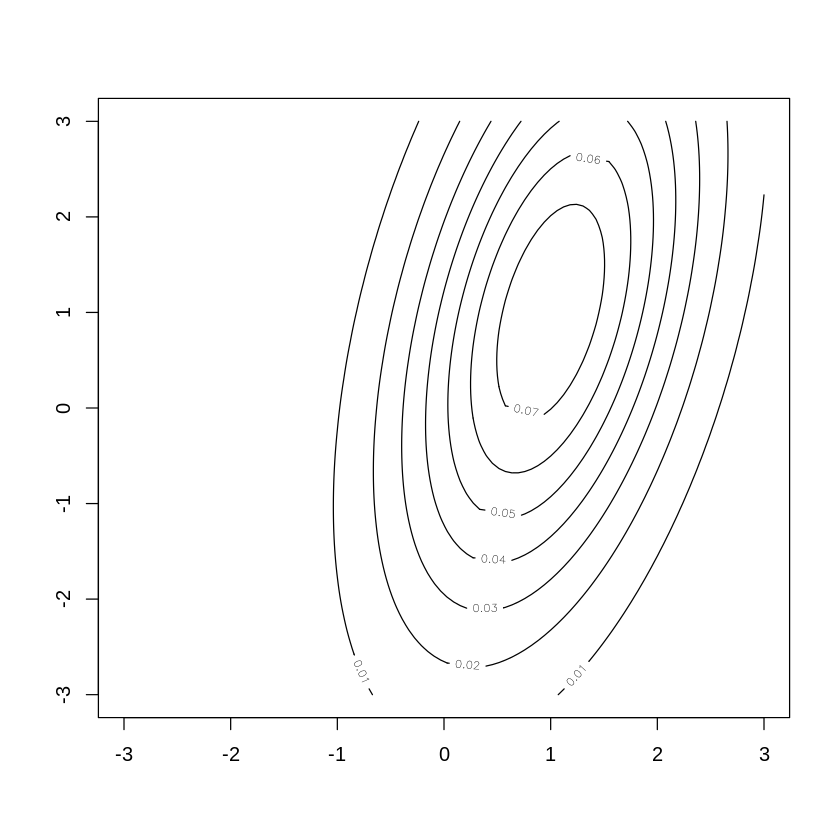

In [ ]:

library(mvtnorm)
x.points <- seq(-3,3,length.out=100)
y.points <- x.points
z <- matrix(0,nrow=100,ncol=100)
mu <- c(1,1)
sigma <- matrix(c(1,1,1,5),nrow=2)
for (i in 1:100) {
 for (j in 1:100) {
 z[i,j] <- dmvnorm(c(x.points[i],y.points[j]),
 mean=mu,sigma=sigma)
 }
}
contour(x.points,y.points,z)

2. Simulation d’un mélange de distributions gaussiennes multivariées

> Nous utilisons dans cette partie le package **MixSim** afin de simuler un mélange de modèls gaussiens mais aussi afin de simuler des datatsets à partir du mélange guassien. 


*  La fonction **MixSim()** nous permet d'obtenir la simulation de du mélange de de modèles gaussiens multivariés qui satisfait  la pairwise overlap ( chevauchement par paire) moyen spécifié via le paramètre **BarOmega** ainsi que le pairwise overlap maximal spécifié avec le paramètre **MaxOmega**. Pour notre trois jeux de données on a spécifié ces deux paramètres, de ce fait l'algorithme utilisé pour la simulation nous permet de controler le degrée d'interaction entre les classes du mélange, en effet en spécifiant la valeur de 0 pour le jeu1 on obtient une jeu de donnée avec des classes bien séparées contrairement à jeu2 et jeu3. Nous avons spécifiés le nombre de classes via le paramètre **K** et la dimension via le paramètre **p**. la propriété sphérique est indiqué en mettant le paramètre **sph** à *TRUE* ( par défaut c'est *FALSE*). Le paramètre PiLow étant par défaut à 1, nous aurons l'égalité de toutes les proportions de mélange.

* La fonction **simdatest()** nous permet de générer des dataset selon un mélange gaussien spécifié. Nous indiquon le nombre d'éléments de notre dataset à travers le paramètre **n**, les valeurs des paramètre **Pi** ( vecteur des proportions de mélange) **Mu** (vecteurs de la moyenne) et **S** ( matrices variance covariances) sont en sortie de la fonction **MixSim()**. On aura en sortie via **X** le dataset produit et dans **id** le vecteur de classification.

In [ ]:
install.packages("MixSim")
install.packages("MASS")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library("MixSim")
library("MASS")

# Création de jeux de données avec MixSim
# jeu 1
jeu1.Q <- MixSim(MaxOmega = 0.0, BarOmega = 0.0, K = 2, p = 2, sph = TRUE)
jeu1 <- simdataset(n = 500, Pi = jeu1.Q$Pi, Mu = jeu1.Q$Mu, S = jeu1.Q$S)

#jeu 2
jeu2.Q <- MixSim(MaxOmega = 0.10, BarOmega = 0.05, K = 3, p = 2, sph = TRUE)
jeu2 <- simdataset(n = 500, Pi = jeu2.Q$Pi, Mu = jeu2.Q$Mu, S = jeu2.Q$S)

#jeu 3
jeu3.Q <- MixSim(MaxOmega = 0.10, BarOmega = 0.05, K = 3, p = 2, sph = FALSE)
jeu3 <- simdataset(n = 500, Pi = jeu3.Q$Pi, Mu = jeu3.Q$Mu, S = jeu3.Q$S)


Loading required package: MASS



La commande **summary() **nous permet d'afficher la matrice de probabilités de mal classification, ainsi que les classes qui ont le chevauchement maximal (rcMax).

* Pour  **jeu1**, on peut voir que les valeurs spécifiés en ce qui concerne le pairwaise overlap sont atteintes avec des valeurs nulles pour BarOmega et MaxOmega. Par conséquent les classes sont totalement séparés

*   En ce qui concerne **jeu2**, le chevauchement maximale est atteint entre la classe 1 et 2 avec une probabilité de mauvaise classification de 0.0280 et 0.07169. Nous pouvons également constater que BarOmega et MaxOmega satifaisent les valeurs souhaités.

*   Enfin **jeu3**, en plus d'avoir un chauvechement moyen et maximal qui correspond aux valeurs introduites en paramètres, les classes 1 et 2 sont celles qui réalise le overlap maximal avec des probabilités de  0.0391 et 0.0608.

In [ ]:
summary(jeu1.Q)
bar.omega <- jeu1.Q$BarOmega
max.omega <- jeu1.Q$MaxOmega
print(paste("BarOmega = ", bar.omega ))
print(paste("MaxOmega =", max.omega))

OmegaMap: 
    k.1 k.2
k.1   1   0
k.2   0   1

rcMax: 1 2 
[1] "BarOmega =  0"
[1] "MaxOmega = 0"


In [ ]:
summary(jeu2.Q)
bar.omega <- jeu2.Q$BarOmega
max.omega <- jeu2.Q$MaxOmega
print(paste("BarOmega = ", bar.omega ))
print(paste("MaxOmega =", max.omega))

OmegaMap: 
             k.1        k.2          k.3
k.1 1.000000e+00 0.01291106 1.750608e-06
k.2 3.708449e-02 1.00000000 7.351440e-02
k.3 1.865991e-06 0.02648621 1.000000e+00

rcMax: 2 3 
[1] "BarOmega =  0.0499999279742249"
[1] "MaxOmega = 0.100000609342696"


In [ ]:
summary(jeu3.Q)
bar.omega <- jeu3.Q$BarOmega
max.omega <- jeu3.Q$MaxOmega
print(paste("BarOmega = ", bar.omega ))
print(paste("MaxOmega =", max.omega))

OmegaMap: 
            k.1         k.2          k.3
k.1 1.000000000 0.040631244 0.0568766366
k.2 0.008184328 1.000000000 0.0002141354
k.3 0.043124263 0.000969887 1.0000000000

rcMax: 1 3 
[1] "BarOmega =  0.0500001644809217"
[1] "MaxOmega = 0.100000899223452"


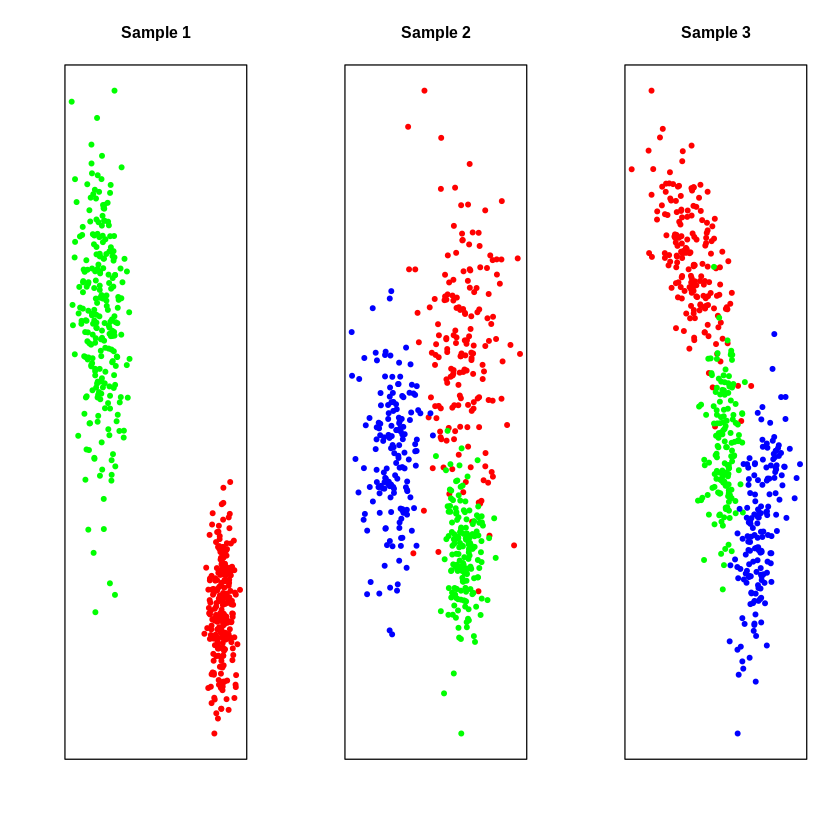

In [ ]:
# Représentation graphique 
my_plot = function(jeu, predicts, title){
  plot(jeu$X, col = colors[predicts], pch = 19, cex = 0.8,
       xlab = "", ylab = "", axes = F, main = title)
  box()
}

colors <- c("red", "green", "blue")
par(mfrow=c(1,3))
my_plot(jeu1,jeu1$id,"Sample 1")
my_plot(jeu2,jeu2$id,"Sample 2")
my_plot(jeu3,jeu3$id,"Sample 3")

In [ ]:
install.packages("plotly")

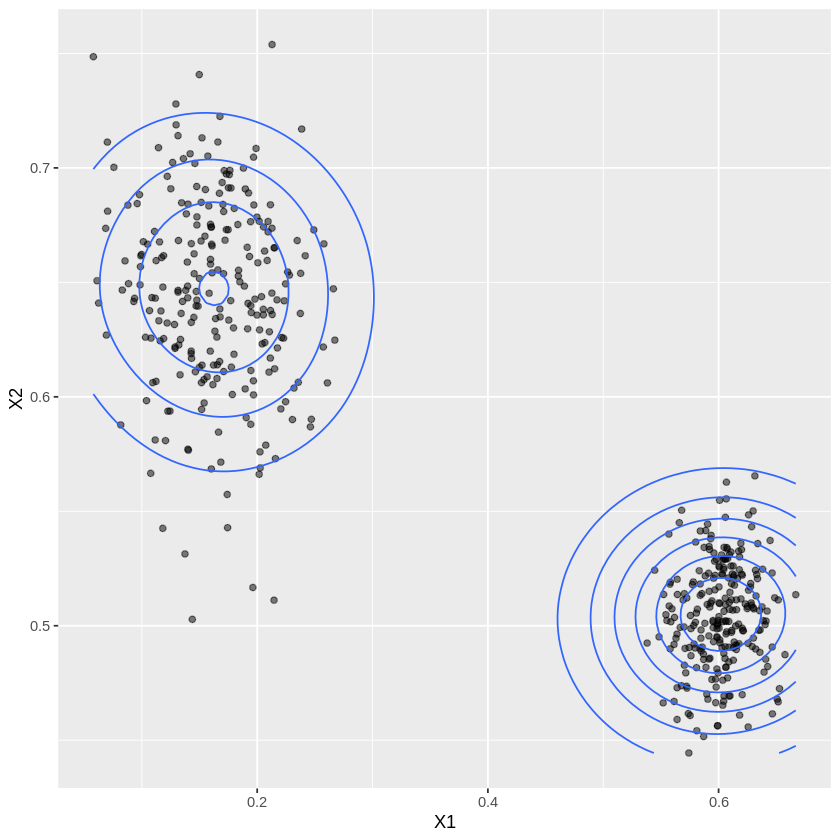

In [ ]:
library(plotly)
df <- data.frame(X1=jeu1$X[,1],
X2=jeu1$X[,2])

p1 <- ggplot(df, aes(x = X1, y = X2)) +
  geom_point(alpha = .5) +
  geom_density_2d()
p1

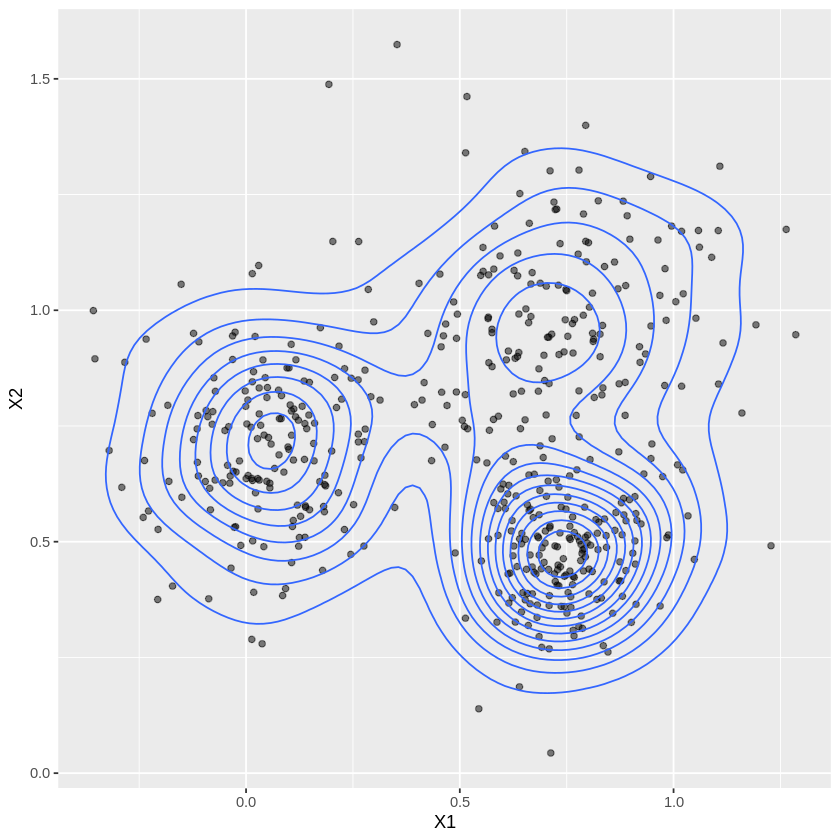

In [ ]:
library(plotly)
df <- data.frame(X1=jeu2$X[,1],
X2=jeu2$X[,2])

p2 <- ggplot(df, aes(x = X1, y = X2)) +
  geom_point(alpha = .5) +
  geom_density_2d()
p2

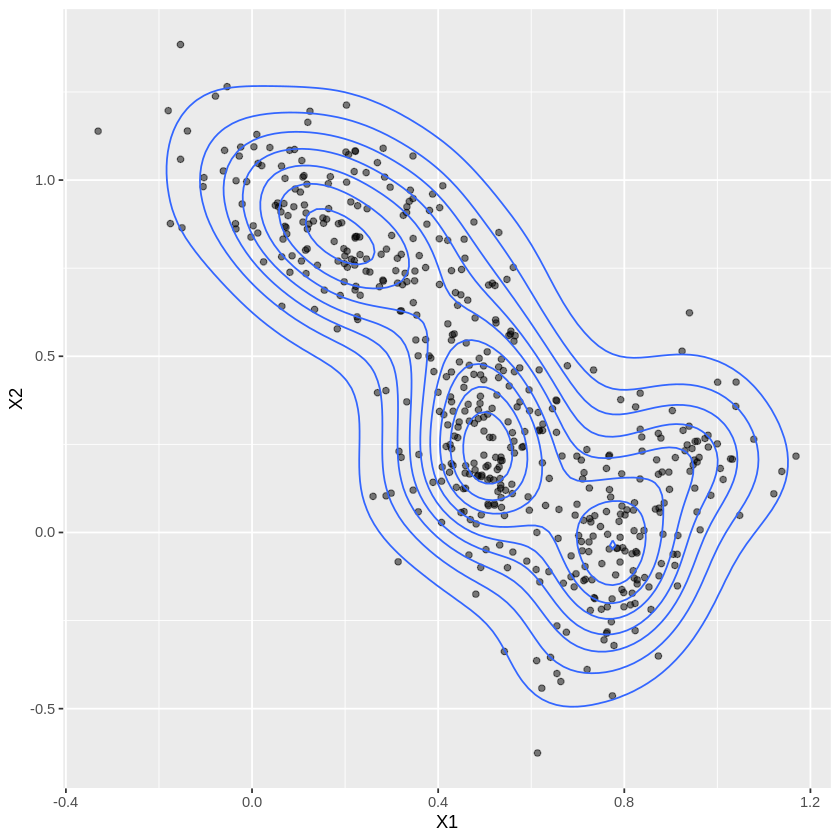

In [ ]:
library(plotly)
df <- data.frame(X1=jeu3$X[,1],
X2=jeu3$X[,2])

p3 <- ggplot(df, aes(x = X1, y = X2)) +
  geom_point(alpha = .5) +
  geom_density_2d()
p3

# **Partie 2:**



1.   Découpage du jeu de données en données d'apprentissage et données de test

Dans le but d'évaluer la qualité de la classification sur notre jeu de données, nous avons gardé 20% des données pour la partie test.



In [ ]:
table.data.jeu1<- data.frame(x1=jeu1$X[,1], x2=jeu1$X[,2], class=jeu1$id)
table.data.jeu2<- data.frame(x1=jeu2$X[,1], x2=jeu2$X[,2], class=jeu2$id)
table.data.jeu3<- data.frame(x1=jeu3$X[,1], x2=jeu3$X[,2], class=jeu3$id)

In [ ]:
split_data=function(table.data){
  set.seed(42)
  table.data.shuffle<- table.data[sample(nrow(table.data)),]

  n=dim(table.data.shuffle)[1]
  index= sample(n,0.8*n)
  train=table.data.shuffle[index,]
  test=table.data.shuffle[-index,]

  return (list("train"= train, "test"=test))
}

In [ ]:
train.jeu1=split_data(table.data.jeu1)$train
test.jeu1=split_data(table.data.jeu1)$test

train.jeu2=split_data(table.data.jeu2)$train
test.jeu2=split_data(table.data.jeu2)$test

train.jeu3=split_data(table.data.jeu3)$train
test.jeu3=split_data(table.data.jeu3)$test

2.   Implémentation de  la règle de classification gi(X)

On introduit à la fonction comme paramètres d'entrée, notre variable, le jeu de donnée, et le numéro de la classe. Elle renvoie par la suite la probabilité d'appartenance de la variable x à la classe.

In [ ]:
discriminant_func = function(x.var,table.data,class.num){

  class.data = table.data[table.data[,3] == class.num,][,-3]
  moy <- colMeans(class.data)
  var.cov <- cov(class.data)
  inv.varcov <- solve(var.cov)
  det.varcov <- det(var.cov)
  proba.class <- nrow(class.data) / nrow(table.data)
  x.centred <- x.var - moy
  return( 0-0.5 * t(x.centred) %*% inv.varcov %*% x.centred - 0.5 * log(det.varcov) + log(proba.class)   )
}



3. Implementation d'une fonction qui retourne le label pour un individu par rapport à un jeu de donnée

Cette fonction calcule la valeur de la fonction desciminante pour toutes les calsses et retourne la classe qui maximise la fonction desciminate pour l'individu x.

In [ ]:
get_label= function(x.var, dataset){
  
  labels<-unique(dataset[,3])
  discriminant_tab<- c()
  for (i in labels){
    discriminant_function<- discriminant_func(x.var, dataset, i)
    discriminant_tab<- c(discriminant_tab, discriminant_function)  
  }

  lab= labels[which.max(discriminant_tab)]
 return(lab)
}

4. Implementation d'une fonction qui permet de calculer la précision du classifieur

Cette fonction calcule la précision entre les labels réels et les labels calculés avec la fonction get_label 

In [ ]:
get_accuracy<- function (train, test){
  labels.predicted<- c()
  for (i in 1:dim(test)[1] ){
    a<- c(test[,-3]$x1[i], test[,-3]$x2[i])
    labels.predicted<- c(labels.predicted,get_label(a, train))
  }

  confusion=table(labels.predicted, test[,3])
  acc <- sum(diag(confusion))/sum(confusion)
  return(acc)
}



> Précision pour le jeu de données 1: deux classes sphériques et bien
séparées

Les classes sont entiérement séparées ce qui justifie la précision égale à 1 pour le jeu de données 1.



In [ ]:
get_accuracy(train.jeu1, test.jeu1)

[1] 1

> Précision pour le jeu de données 2: classes sphériques et un degré de
mélange différent de zéro

Les classes sont pas bien séparés et les individus de différentes classes sont proches l'un de l'autre, c'est pour ça que la précision diminue. 

In [ ]:
get_accuracy(train.jeu2, test.jeu2)

[1] 0.96

> Précision pour le jeu de données 3: 3 classes non- sphériques et un
degré de mélange différent de zéro

Les individus de la méme classes sont plus proches l'un de l'autre pour le jeu de données 3 par rapport au jeu de données 2, donc les classes sont mieux séparables, ce qui justifie l'amélioration de la précision. 

In [ ]:
get_accuracy(train.jeu3, test.jeu3)

[1] 0.98


> Fonction permettant de Calculer l'équation de gi(X) = gj(X) et renvoie a,b,c tel que gi(X) - gj(X) = tX a X + b X + c



In [ ]:
separation_line <- function (i,j, dataset) {

   table.data <- data.frame(x1=dataset$X[,1],
     x2=dataset$X[,2], class=dataset$id)

  #Class i
  class.data.i = table.data[table.data$class == i,][,-3]
  moy.i <- colMeans(class.data.i)
  var.cov.i <- cov(class.data.i)
  inv.varcov.i <- solve(var.cov.i)
  det.varcov.i <- det(var.cov.i)
  proba.class.i <- nrow(class.data.i) / nrow(table.data)
  #Classe j
  class.data.j = table.data[table.data$class == j,][,-3]
  moy.j <- colMeans(class.data.j)
  var.cov.j <- cov(class.data.j)
  inv.varcov.j <- solve(var.cov.j)
  det.varcov.j <- det(var.cov.j)
  proba.class.j <- nrow(class.data.j) / nrow(table.data)
  # sol gi(x) = gj(x)
  a <- 0 - 0.5*(var.cov.i - var.cov.j)
  b <- t(moy.i) %*% inv.varcov.i - t(moy.j) %*% inv.varcov.j
  c <-   (0 - 0.5 * t(moy.i) %*% inv.varcov.i %*% moy.i - 0.5 * log(det.varcov.i) + log(proba.class.i) ) - (0 - 0.5 * t(moy.j) %*% inv.varcov.j %*% moy.j - 0.5 * log(det.varcov.j) + log(proba.class.j) )
  #param_list <- list("a"= a, "b" =b, "c"=c)
  
  return (list("a"= a, "b" =b, "c"=c))


 
}